In [1]:
!pip install qiskit-nature pyscf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import qiskit, qiskit_nature, pyscf

# Qiskit Nature
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver, InitialGuess
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import FermionicOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.minimum_eigensolvers import VQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SLSQP, COBYLA
from qiskit.primitives import Estimator

# PySCF
from pyscf import gto, scf

# Driver Run from Qiskit PySCFDRIVER

In [3]:
def fermi_operator(driver, name='Atom-X'):
    print(name)
    problem = driver.run()
    hamiltonian = problem.hamiltonian
    
    second_q_op = hamiltonian.second_q_op()
    clean_second_q_op = copy.deepcopy(second_q_op)
    
    Nuc = problem.nuclear_repulsion_energy
    
    #Menghapus fermi op yang tidak digunakan dan bernilai 0
    remove_list = []
    for key, value in second_q_op._data.items():
        key_l = len(key)
        if key_l == 7:
            continue
        elif key_l == 15:
            op1 = key[2] 
            op2 = key[6]
            op3 = key[10]
            op4 = key[14] 

            if op1 == op2:
                remove_list.append(key)
            elif op3 == op4:
                remove_list.append(key)
                
    [clean_second_q_op._data.pop(key) for key in remove_list]
    # print('Nuclear:', Nuc)
    # print(clean_second_q_op)
    # print()
    return Nuc, clean_second_q_op

# STO-3G Basis set

## Hamiltonian set up

### H sequence

In [4]:
H_driver = PySCFDriver(
    atom = "H 0 0 0",
    basis = 'sto-3g',
    charge = 0, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

He_p_driver = PySCFDriver(
    atom = "He 0 0 0",
    basis = 'sto-3g',
    charge = 1, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

Li_p2_driver = PySCFDriver(
    atom = "Li 0 0 0",
    basis = 'sto-3g',
    charge = 2, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

Be_p3_driver = PySCFDriver(
    atom = "Be 0 0 0",
    basis = 'sto-3g',
    charge = 3, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

B_p4_driver = PySCFDriver(
    atom = "B 0 0 0",
    basis = 'sto-3g',
    charge = 4, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

C_p5_driver = PySCFDriver(
    atom = "C 0 0 0",
    basis = 'sto-3g',
    charge = 5, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

N_p6_driver = PySCFDriver(
    atom = "N 0 0 0",
    basis = 'sto-3g',
    charge = 6, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

O_p7_driver = PySCFDriver(
    atom = "O 0 0 0",
    basis = 'sto-3g',
    charge = 7, #charge = 2 proton - 1 electron = +1
    spin = 1, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

In [5]:
Nuc_H, H_clean_s_op = fermi_operator(H_driver, name='H')
Nuc_He_p, He_p_clean_s_op = fermi_operator(He_p_driver, name='He+')
Nuc_Li_p2, Li_p2_clean_s_op = fermi_operator(Li_p2_driver, name='Li+2')
Nuc_Be_p3, Be_p3_clean_s_op = fermi_operator(Be_p3_driver, name='Be+3')
Nuc_B_p4, B_p4_clean_s_op = fermi_operator(B_p4_driver, name='B+4')
Nuc_C_p5, C_p5_clean_s_op = fermi_operator(C_p5_driver, name='C+5')
Nuc_N_p6, N_p6_clean_s_op = fermi_operator(N_p6_driver, name='N+6')
Nuc_O_p7, O_p7_clean_s_op = fermi_operator(O_p7_driver, name='O+7')

H
He+
Li+2
Be+3
B+4
C+5
N+6
O+7


### He Sequence

In [6]:
H_m_driver = PySCFDriver(
    atom = "H 0 0 0",
    basis = 'sto-3g',
    charge = -1, #charge = 1 proton - 2 electron = -1
    spin = 0, #2*spin == 2 (0) = 0
    unit = DistanceUnit.BOHR,
)

He_driver = PySCFDriver(
    atom = "He 0 0 0",
    basis = 'sto-3g',
    charge = 0, #charge = 2 proton - 2 electron = +1
    spin = 0, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

Li_p_driver = PySCFDriver(
    atom = "Li 0 0 0",
    basis = 'sto-3g',
    charge = 1, #charge = 2 proton - 1 electron = +1
    spin = 0, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

Be_p2_driver = PySCFDriver(
    atom = "Be 0 0 0",
    basis = 'sto-3g',
    charge = 2, #charge = 2 proton - 1 electron = +1
    spin = 0, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

B_p3_driver = PySCFDriver(
    atom = "B 0 0 0",
    basis = 'sto-3g',
    charge = 3, #charge = 2 proton - 1 electron = +1
    spin = 0, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

C_p4_driver = PySCFDriver(
    atom = "C 0 0 0",
    basis = 'sto-3g',
    charge = 4, #charge = 2 proton - 1 electron = +1
    spin = 0, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

N_p5_driver = PySCFDriver(
    atom = "N 0 0 0",
    basis = 'sto-3g',
    charge = 5, #charge = 2 proton - 1 electron = +1
    spin = 0, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

O_p6_driver = PySCFDriver(
    atom = "O 0 0 0",
    basis = 'sto-3g',
    charge = 6, #charge = 2 proton - 1 electron = +1
    spin = 0, #2*spin == 2 (1/2) = 1
    unit = DistanceUnit.BOHR,
)

In [7]:
Nuc_H_m, H_m_clean_s_op = fermi_operator(H_m_driver, name='H-')
Nuc_He, He_clean_s_op = fermi_operator(He_driver, name='He')
Nuc_Li_p, Li_p_clean_s_op = fermi_operator(Li_p_driver, name='Li+')
Nuc_Be_p2, Be_p2_clean_s_op = fermi_operator(Be_p2_driver, name='Be+2')
Nuc_B_p3, B_p3_clean_s_op = fermi_operator(B_p3_driver, name='B+3')
Nuc_C_p4, C_p4_clean_s_op = fermi_operator(C_p4_driver, name='C+4')
Nuc_N_p5, N_p5_clean_s_op = fermi_operator(N_p5_driver, name='N+5')
Nuc_O_p6, O_p6_clean_s_op = fermi_operator(O_p6_driver, name='O+6')

H-
He
Li+
Be+2
B+3
C+4
N+5
O+6


## Choosing hamiltonian operator

In [8]:
one_elec_op = ['+_0 -_0','+_0 +_1 -_1 -_0', '+_1 +_0 -_0 -_1',]

two_elec_op1 = ['+_0 -_0','+_1 -_1','+_0 +_1 -_1 -_0', '+_1 +_0 -_0 -_1',]

two_elec_op2 = ['+_0 -_0','+_5 -_5','+_0 +_5 -_5 -_0', '+_5 +_0 -_0 -_5',]

In [9]:
def choose_op(q_op, choose, new_h):
    copy_op = copy.deepcopy(q_op)
    keys = q_op._data.keys()
    for key in keys:
        if key in choose:
            continue
        copy_op._data.pop(key, None)
    
    if new_h == 1:
        op_dict = {}
        for i, j in copy_op._data.items():
            op_dict[i] = j
            
    elif new_h == 2:
        name_dict=two_elec_op1
        op_dict = {}
        no = 0
        for i, j in copy_op._data.items():
            op_dict[name_dict[no]] = j
            no += 1
    
    final_op = FermionicOp(op_dict,num_spin_orbitals=2)
    
    return final_op

### H sequence

In [10]:
H_final_s_op = choose_op(q_op = H_clean_s_op, choose = one_elec_op, new_h = 1)
He_p_final_s_op = choose_op(q_op = He_p_clean_s_op, choose = one_elec_op, new_h = 1)
Li_p2_final_s_op = choose_op(q_op = Li_p2_clean_s_op, choose = one_elec_op, new_h = 1)
Be_p3_final_s_op = choose_op(q_op = Be_p3_clean_s_op, choose = one_elec_op, new_h = 1)
B_p4_final_s_op = choose_op(q_op = B_p4_clean_s_op, choose = one_elec_op, new_h = 1)
C_p5_final_s_op = choose_op(q_op = C_p5_clean_s_op, choose = one_elec_op, new_h = 1)
N_p6_final_s_op = choose_op(q_op = N_p6_clean_s_op, choose = one_elec_op, new_h = 1)
O_p7_final_s_op = choose_op(q_op = O_p7_clean_s_op, choose = one_elec_op, new_h = 1)

### He Sequence

In [11]:
H_m_final_s_op = choose_op(q_op = H_m_clean_s_op, choose = two_elec_op1, new_h=1)
He_final_s_op = choose_op(q_op = He_clean_s_op, choose = two_elec_op1, new_h=1)
Li_p_final_s_op = choose_op(q_op = Li_p_clean_s_op, choose = two_elec_op2, new_h = 2)
Be_p2_final_s_op = choose_op(q_op = Be_p2_clean_s_op, choose = two_elec_op2, new_h = 2)
B_p3_final_s_op = choose_op(q_op = B_p3_clean_s_op, choose = two_elec_op2, new_h = 2)
C_p4_final_s_op = choose_op(q_op = C_p4_clean_s_op, choose = two_elec_op2, new_h = 2)
N_p5_final_s_op = choose_op(q_op = N_p5_clean_s_op, choose = two_elec_op2, new_h = 2)
O_p6_final_s_op = choose_op(q_op = O_p6_clean_s_op, choose = two_elec_op2, new_h = 2)

## Solve hamiltonian using Numpy (exact) and VQE

In [12]:
def compute_eig(Nuc, q_op, name = 'Atom-X'):
    
    # Merubah ke qubit
    mapper = JordanWignerMapper()
    qubit = mapper.map(second_q_ops = q_op)
    N_qubit = qubit.num_qubits
    
    # Numpy
    numpy_solver = NumPyMinimumEigensolver()
    np_result = numpy_solver.compute_minimum_eigenvalue(operator=qubit)
    E_np = np_result.eigenvalue.real + Nuc
    
    # print
    print(name)
    print(q_op)
    print(qubit)
    print('\nNumber of qubit:', N_qubit)
    print()
    
    return E_np

### H sequence

In [13]:
H_np = compute_eig(Nuc = Nuc_H, q_op = H_final_s_op, name = 'H')
He_p_np = compute_eig(Nuc = Nuc_He_p, q_op = He_p_final_s_op, name = 'He+')
Li_p2_np = compute_eig(Nuc = Nuc_Li_p2, q_op = Li_p2_final_s_op, name = 'Li+2')
Be_p3_np = compute_eig(Nuc = Nuc_Be_p3, q_op = Be_p3_final_s_op, name = 'Be+3')
B_p4_np = compute_eig(Nuc = Nuc_B_p4, q_op = B_p4_final_s_op, name = 'B+4')
C_p5_np = compute_eig(Nuc = Nuc_C_p5, q_op = C_p5_final_s_op, name = 'C+5')
N_p6_np = compute_eig(Nuc = Nuc_N_p6, q_op = N_p6_final_s_op, name = 'N+6')
O_p7_np = compute_eig(Nuc = Nuc_O_p7, q_op = O_p7_final_s_op, name = 'O+7')

H
Fermionic Operator
number spin orbitals=2, number terms=3
  -0.46658184955727533 * ( +_0 -_0 )
+ 0.3873029719599489 * ( +_0 +_1 -_1 -_0 )
+ 0.3873029719599489 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-0.03963944+0.j,  0.03963944+0.j, -0.19365149+0.j,  0.19365149+0.j])

Number of qubit: 2

He+
Fermionic Operator
number spin orbitals=2, number terms=3
  -1.931748450137523 * ( +_0 -_0 )
+ 0.5278564713675361 * ( +_0 +_1 -_1 -_0 )
+ 0.5278564713675361 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-0.70194599+0.j,  0.70194599+0.j, -0.26392824+0.j,  0.26392824+0.j])

Number of qubit: 2

Li+2
Fermionic Operator
number spin orbitals=2, number terms=3
  -4.407952827261486 * ( +_0 -_0 )
+ 0.1921338756403566 * ( +_0 +_1 -_1 -_0 )
+ 0.1921338756403566 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-2.10790948+0.j,  2.10790948+0.j, -0.09606694+0.j,  0.09606694+0.j])

Number of qubi

### He sequence

In [14]:
H_m_np = compute_eig(Nuc = Nuc_H_m, q_op = H_m_final_s_op, name = 'H-')
He_np = compute_eig(Nuc = Nuc_He, q_op = He_final_s_op, name = 'He')
Li_p_np = compute_eig(Nuc = Nuc_Li_p, q_op = Li_p_final_s_op, name = 'Li+')
Be_p2_np = compute_eig(Nuc = Nuc_Be_p2, q_op = Be_p2_final_s_op, name = 'Be+2')
B_p3_np = compute_eig(Nuc = Nuc_B_p3, q_op = B_p3_final_s_op, name = 'B+3')
C_p4_np = compute_eig(Nuc = Nuc_C_p4, q_op = C_p4_final_s_op, name = 'C+4')
N_p5_np = compute_eig(Nuc = Nuc_N_p5, q_op = N_p5_final_s_op, name = 'N+5')
O_p6_np = compute_eig(Nuc = Nuc_O_p6, q_op = O_p6_final_s_op, name = 'O+6')

H-
Fermionic Operator
number spin orbitals=2, number terms=4
  -0.46658184955727533 * ( +_0 -_0 )
+ -0.46658184955727533 * ( +_1 -_1 )
+ 0.3873029719599489 * ( +_0 +_1 -_1 -_0 )
+ 0.3873029719599489 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-0.27293036+0.j,  0.03963944+0.j,  0.03963944+0.j,  0.19365149+0.j])

Number of qubit: 2

He
Fermionic Operator
number spin orbitals=2, number terms=4
  -1.931748450137523 * ( +_0 -_0 )
+ -1.931748450137523 * ( +_1 -_1 )
+ 0.5278564713675361 * ( +_0 +_1 -_1 -_0 )
+ 0.5278564713675361 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-1.66782021+0.j,  0.70194599+0.j,  0.70194599+0.j,  0.26392824+0.j])

Number of qubit: 2

Li+
Fermionic Operator
number spin orbitals=2, number terms=4
  -4.398682275993077 * ( +_0 -_0 )
+ -4.398682275993077 * ( +_1 -_1 )
+ 0.8309584614860211 * ( +_0 +_1 -_1 -_0 )
+ 0.8309584614860211 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],


# 1s Basis set

## Coefficient 1s orbital set up

In [15]:
def Hamil_H(Z, alpha = 1.24):
    h00 = alpha**2/2 - Z*alpha
    h0000 = 5/8*alpha
    return h00, h0000

### H sequence, $\alpha = Z$ 

In [16]:
alpha_list = [alpha for alpha in range(1,9)]
hpq_list = []
hpqrs_list = []
for i, j in enumerate(alpha_list):
    hpq, hpqrs = Hamil_H(Z=i+1, alpha = j)
    hpq_list.append(hpq)
    hpqrs_list.append(hpqrs)
print(alpha_list)
print(hpq_list)
print(hpqrs_list)

[1, 2, 3, 4, 5, 6, 7, 8]
[-0.5, -2.0, -4.5, -8.0, -12.5, -18.0, -24.5, -32.0]
[0.625, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5.0]


### He sequence, $\alpha = Z - \frac{5}{16}$

In [17]:
alpha_list2 = [(Z - 5/16) for Z in range(1,9)]
hpq_list2 = []
hpqrs_list2 = []
for i, j in enumerate(alpha_list2):
    hpq2, hpqrs2 = Hamil_H(Z=i+1, alpha = j)
    hpq_list2.append(hpq2)
    hpqrs_list2.append(hpqrs2)
print(alpha_list2)
print(hpq_list2)
print(hpqrs_list2)

[0.6875, 1.6875, 2.6875, 3.6875, 4.6875, 5.6875, 6.6875, 7.6875]
[-0.451171875, -1.951171875, -4.451171875, -7.951171875, -12.451171875, -17.951171875, -24.451171875, -31.951171875]
[0.4296875, 1.0546875, 1.6796875, 2.3046875, 2.9296875, 3.5546875, 4.1796875, 4.8046875]


## Solve hamiltonian using Numpy (exact) and VQE

### H sequence

In [18]:
one_elec_op = ['+_0 -_0','+_0 +_1 -_1 -_0', '+_1 +_0 -_0 -_1',]
H_sequence_name = ['H','He+','Li2+','Be3+','B4+','C5+','N6+','O7+']
H_sequence_exact = [-Z**2/ 2 for Z in range(1,9)]

In [19]:
E_H_np_list2 = []
for i, j in enumerate(H_sequence_name):
    H_seq_op = FermionicOp(
        {
            "+_0 -_0": hpq_list[i],
            '+_0 +_1 -_1 -_0': 1/2*hpqrs_list[i],
            '+_1 +_0 -_0 -_1': 1/2*hpqrs_list[i],
        },
        num_spin_orbitals=2,
    )
    
    H_seq_np = compute_eig(Nuc = 0, q_op = H_seq_op, name = H_sequence_name[i])
    E_H_np_list2.append(H_seq_np)

H
Fermionic Operator
number spin orbitals=2, number terms=3
  -0.5 * ( +_0 -_0 )
+ 0.3125 * ( +_0 +_1 -_1 -_0 )
+ 0.3125 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-0.09375+0.j,  0.09375+0.j, -0.15625+0.j,  0.15625+0.j])

Number of qubit: 2

He+
Fermionic Operator
number spin orbitals=2, number terms=3
  -2.0 * ( +_0 -_0 )
+ 0.625 * ( +_0 +_1 -_1 -_0 )
+ 0.625 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-0.6875+0.j,  0.6875+0.j, -0.3125+0.j,  0.3125+0.j])

Number of qubit: 2

Li2+
Fermionic Operator
number spin orbitals=2, number terms=3
  -4.5 * ( +_0 -_0 )
+ 0.9375 * ( +_0 +_1 -_1 -_0 )
+ 0.9375 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-1.78125+0.j,  1.78125+0.j, -0.46875+0.j,  0.46875+0.j])

Number of qubit: 2

Be3+
Fermionic Operator
number spin orbitals=2, number terms=3
  -8.0 * ( +_0 -_0 )
+ 1.25 * ( +_0 +_1 -_1 -_0 )
+ 1.25 * ( +_1 +_0 -_0 -_1 )
SparsePaul

### He-sequence

In [20]:
two_elec_op = ['+_0 -_0','+_1 -_1','+_0 +_1 -_1 -_0', '+_1 +_0 -_0 -_1',]
He_sequence_name = ['H-','He','Li+','Be2+','B3+','C4+','N5+','O6+']
He_sequence_ref = [-0.5277,-2.9034,-7.2799,-13.6556,-22.031,-32.4062,-44.7814,-59.1566]

In [21]:
E_He_np_list2 = []
for i, j in enumerate(He_sequence_name):
    He_seq_op = FermionicOp(
        {
            "+_0 -_0": hpq_list2[i],
            "+_1 -_1": hpq_list2[i],
            '+_0 +_1 -_1 -_0': 1/2*hpqrs_list2[i],
            '+_1 +_0 -_0 -_1': 1/2*hpqrs_list2[i],
        },
        num_spin_orbitals=2,
    )
    
    He_seq_np = compute_eig(Nuc = 0, q_op = He_seq_op, name = He_sequence_name[i])
    E_He_np_list2.append(He_seq_np)

H-
Fermionic Operator
number spin orbitals=2, number terms=4
  -0.451171875 * ( +_0 -_0 )
+ -0.451171875 * ( +_1 -_1 )
+ 0.21484375 * ( +_0 +_1 -_1 -_0 )
+ 0.21484375 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-0.34375   +0.j,  0.11816406+0.j,  0.11816406+0.j,  0.10742188+0.j])

Number of qubit: 2

He
Fermionic Operator
number spin orbitals=2, number terms=4
  -1.951171875 * ( +_0 -_0 )
+ -1.951171875 * ( +_1 -_1 )
+ 0.52734375 * ( +_0 +_1 -_1 -_0 )
+ 0.52734375 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-1.6875    +0.j,  0.71191406+0.j,  0.71191406+0.j,  0.26367188+0.j])

Number of qubit: 2

Li+
Fermionic Operator
number spin orbitals=2, number terms=4
  -4.451171875 * ( +_0 -_0 )
+ -4.451171875 * ( +_1 -_1 )
+ 0.83984375 * ( +_0 +_1 -_1 -_0 )
+ 0.83984375 * ( +_1 +_0 -_0 -_1 )
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[-4.03125   +0.j,  1.80566406+0.j,  1.80566406+0.j,  0.41992188+0.j

# Result

## H sequence

In [22]:
E_H_np_list1 = [H_np,He_p_np,Li_p2_np,Be_p3_np,B_p4_np,C_p5_np,N_p6_np,O_p7_np,]
H_sequence_exact = [-i**2/2 for i in range(1,9)]
H_sequence_name = ['H','He+','Li2+','Be3+','B4+','C5+','N6+','O7+']
x = np.arange(len(E_H_np_list1)) 
width = 0.3

In [23]:
#print 
head = '{:^5} | {:^12} | {:^12} | {:^12}'
rowf = '{:^5} | {:^12.5f} | {:^12.5f} | {:^12.2f}'
print('Hamiltonian H sequence :\n', one_elec_op,'\n')
print(head.format('Atom', 'STO3G', '1s', 'Exact'))
for i, j in enumerate(H_sequence_name):
    print(rowf.format(j,E_H_np_list1[i],E_H_np_list2[i],H_sequence_exact[i]))

Hamiltonian H sequence :
 ['+_0 -_0', '+_0 +_1 -_1 -_0', '+_1 +_0 -_0 -_1'] 

Atom  |    STO3G     |      1s      |    Exact    
  H   |   -0.46658   |   -0.50000   |    -0.50    
 He+  |   -1.93175   |   -2.00000   |    -2.00    
Li2+  |   -4.40795   |   -4.50000   |    -4.50    
Be3+  |   -7.86921   |   -8.00000   |    -8.00    
 B4+  |  -12.32303   |  -12.50000   |    -12.50   
 C5+  |  -17.76299   |  -18.00000   |    -18.00   
 N6+  |  -24.19609   |  -24.50000   |    -24.50   
 O7+  |  -31.61601   |  -32.00000   |    -32.00   


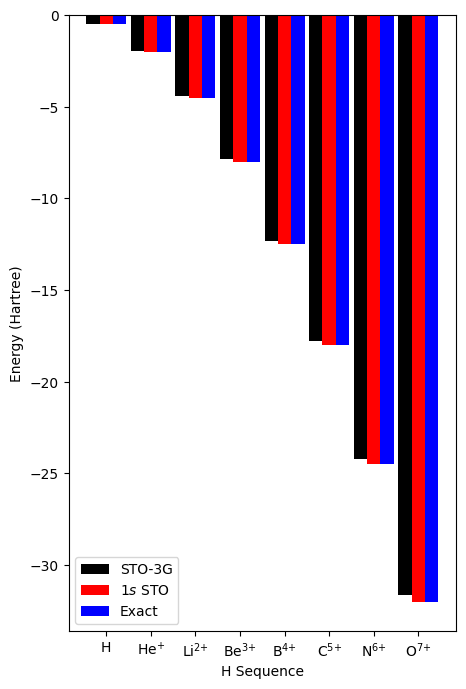

In [24]:
plt.figure(figsize=(5,8))
plt.bar(x-width, E_H_np_list1, width, color='black') 
plt.bar(x, E_H_np_list2, width, color='red') 
plt.bar(x+width, H_sequence_exact, width, color='blue') 
plt.xticks(x, [r'H', r'He$^\plus$', r'Li$^{2\plus}$', r'Be$^{3\plus}$', r'B$^{4\plus}$', r'C$^{5\plus}$',r'N$^{6\plus}$', r'O$^{7\plus}$']) 
plt.ylabel("Energy (Hartree)") 
plt.xlabel("H Sequence") 
plt.legend(["STO-3G", r"1$s$ STO", "Exact"]) 
plt.show() 

## He sequence

In [25]:
E_He_np_list1 = [H_m_np,He_np,Li_p_np,Be_p2_np,B_p3_np,C_p4_np,N_p5_np,O_p6_np,]
He_sequence_ref = [-0.5277,-2.9034,-7.2799,-13.6556,-22.031,-32.4062,-44.7814,-59.1566]
He_sequence_name = ['H-','He','Li+','Be2+','B3+','C4+','N5+','O6+']
x = np.arange(len(E_He_np_list1)) 
width = 0.3

In [26]:
#print 
head = '{:^5} | {:^12} | {:^12} | {:^12}'
rowf = '{:^5} | {:^12.5f} | {:^12.5f} | {:^12.2f}'
print('Hamiltonian He sequence :\n', two_elec_op,'\n')
print(head.format('Atom', 'STO3G', '1s', 'Ref'))
for i, j in enumerate(He_sequence_name):
    print(rowf.format(j,E_He_np_list1[i],E_He_np_list2[i],He_sequence_ref[i]))

Hamiltonian He sequence :
 ['+_0 -_0', '+_1 -_1', '+_0 +_1 -_1 -_0', '+_1 +_0 -_0 -_1'] 

Atom  |    STO3G     |      1s      |     Ref     
 H-   |   -0.46658   |   -0.47266   |    -0.53    
 He   |   -2.80778   |   -2.84766   |    -2.90    
 Li+  |   -7.13545   |   -7.22266   |    -7.28    
Be2+  |  -13.43976   |  -13.59766   |    -13.66   
 B3+  |  -21.72417   |  -21.97266   |    -22.03   
 C4+  |  -31.98675   |  -32.34766   |    -32.41   
 N5+  |  -44.22986   |  -44.72266   |    -44.78   
 O6+  |  -58.45216   |  -59.09766   |    -59.16   


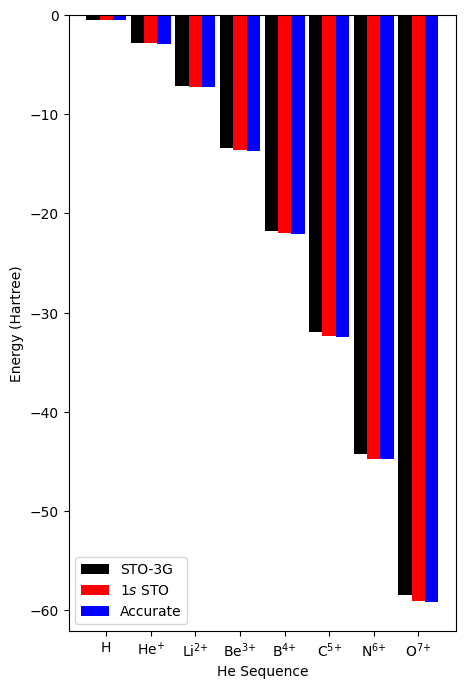

In [27]:
plt.figure(figsize=(5,8))
plt.bar(x-width, E_He_np_list1, width, color='black') 
plt.bar(x, E_He_np_list2, width, color='red') 
plt.bar(x+width, He_sequence_ref, width, color='blue') 
plt.xticks(x, [r'H', r'He$^\plus$', r'Li$^{2\plus}$', r'Be$^{3\plus}$', r'B$^{4\plus}$', r'C$^{5\plus}$',r'N$^{6\plus}$', r'O$^{7\plus}$']) 
plt.ylabel("Energy (Hartree)") 
plt.xlabel("He Sequence") 
plt.legend(["STO-3G", r"1$s$ STO", "Accurate"]) 
plt.show() 

In [28]:
qiskit_ver = qiskit.__version__
qiskit_nature_ver = qiskit_nature.__version__
pyscf_ver = pyscf.__version__

In [29]:
txt = '{:15} : {:}'
print('Library Information')
print(txt.format('Qiskit', qiskit_ver))
print(txt.format('Qiskit Nature', qiskit_nature_ver))
print(txt.format('Pyscf', pyscf_ver))

Library Information
Qiskit          : 1.0.2
Qiskit Nature   : 0.7.2
Pyscf           : 2.5.0
